In [1]:
import numpy as np
import random
from sklearn.datasets import make_blobs 
import pylab
from scipy import stats

In [2]:
# генерируем случайные данные
x, y = make_blobs(n_samples=100, centers=2, n_features=2,
                      random_state=0)

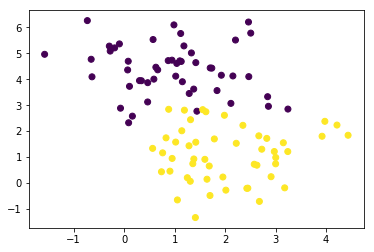

In [3]:
# посмотрим что получилось

pylab.scatter(x[:, 0], x[:, 1], c=y)
pylab.show()

In [4]:
# размер данных

m, n = np.shape(x)
m, n

(100, 2)

In [5]:
# преобразуем x к следующему виду
x = np.c_[ np.ones(m), x]
x[:5]

array([[ 1.        ,  4.21850347,  2.23419161],
       [ 1.        ,  0.90779887,  0.45984362],
       [ 1.        , -0.27652528,  5.08127768],
       [ 1.        ,  0.08848433,  2.32299086],
       [ 1.        ,  3.24329731,  1.21460627]])

In [6]:
# y лист значений
y[:5]

array([1, 1, 0, 0, 1])

### Сначала вручную

In [7]:
# шаг алгоритма
alpha = 0.01

In [53]:
def gradient_descent_2(alpha, x, y, numIterations):
    """
    Функция реализует алгоритм градиентного спуска. На каждом шаге выводится значение функции потерь
    """
    
    m = x.shape[0] # 100
    theta = np.ones(3) # [ 1.  1. 1.] ВЕСА МОДЕЛИ!!!
    x_transpose = x.transpose() # транспонированная матрица x
    
    for iter in range( 0, numIterations ):
        a = 1 / (1 + np.exp(-np.dot(x, theta)))
        
        loss = -y*np.log(a) - (1-y)*np.log(1-a)
        gradient = np.dot((a - y), x) 
        
        logloss = np.log(1 + np.exp(-y * np.dot(x, theta)))   
        gradient_logloss = -np.exp(-np.dot(y, np.dot(x, theta))) / (1 + np.exp(-np.dot(y, np.dot(x, theta))))
        
        theta = theta - alpha * gradient  # update
    
    return theta

In [54]:
%%time
theta = gradient_descent_2(alpha, x, y, 10)

Wall time: 2 ms


In [55]:
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score

y_predict = np.dot(x, theta)
y_predict_norm = (normalize(y_predict1.reshape(-1, 1), norm='l2').T + 1) / 2
y_predict_norm = y_predict_norm[0]

accuracy_score(y, y_predict_norm)

0.9

### Используем готовые методы

In [56]:
from sklearn import linear_model

In [57]:
model = linear_model.LogisticRegression()

In [58]:
# генерируем случайные данные
x1, y2 = make_blobs(n_samples=100, centers=2, n_features=2,
                      random_state=0)

In [59]:
%%time 

model.fit( x1, y2 )

Wall time: 999 µs


C:\Users\Ivan\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
model.intercept_, model.coef_

(array([2.33094357]), array([[ 0.97342214, -1.52164052]]))

In [61]:
y_predict_lr = model.predict( x1 )

In [62]:
model.score(x1, y2)

0.92